# Stock Market Prediction using Decision Tree

In this notebook I take a look at stock market prediction using decision tree and linear regression.

# Importing Libraries

In [2]:
# Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [4]:
# Using data from Apple's stock.
df = pd.read_csv(r'all_stocks_5yr.csv') 

In [5]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [7]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [8]:
df.shape

(619040, 7)

# EDA

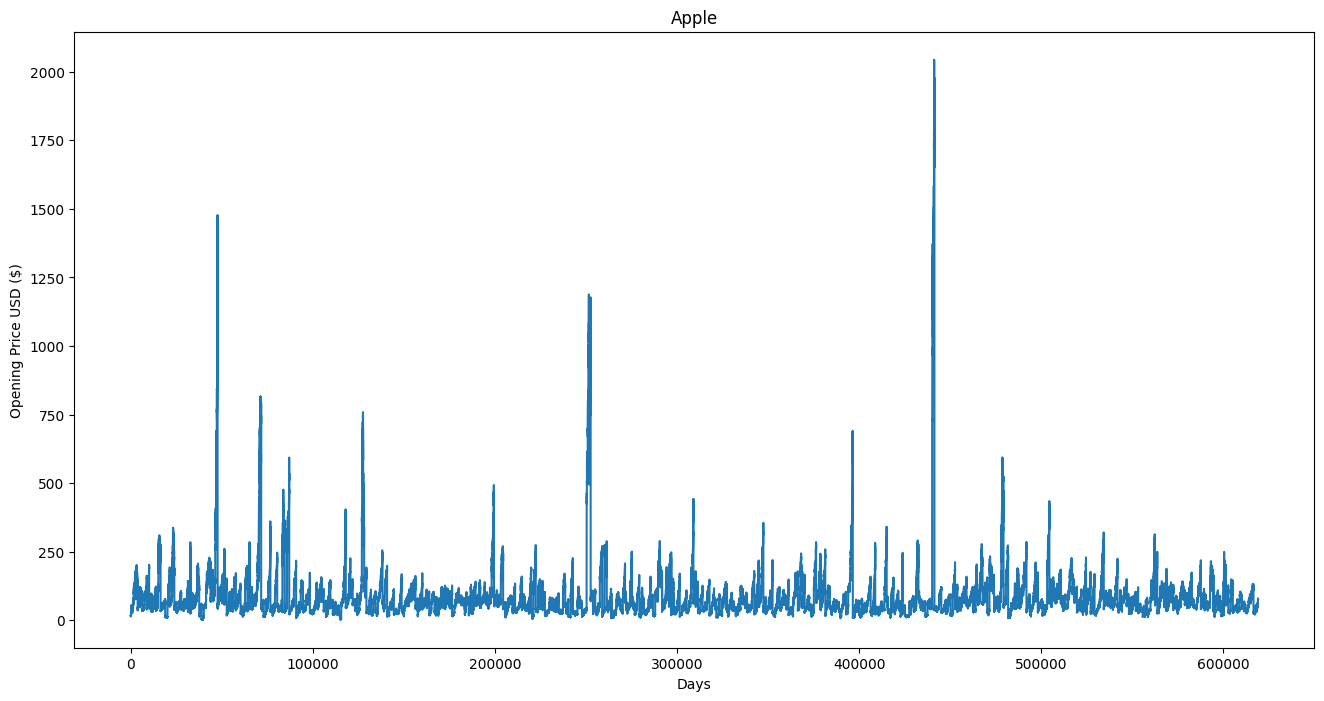

In [9]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

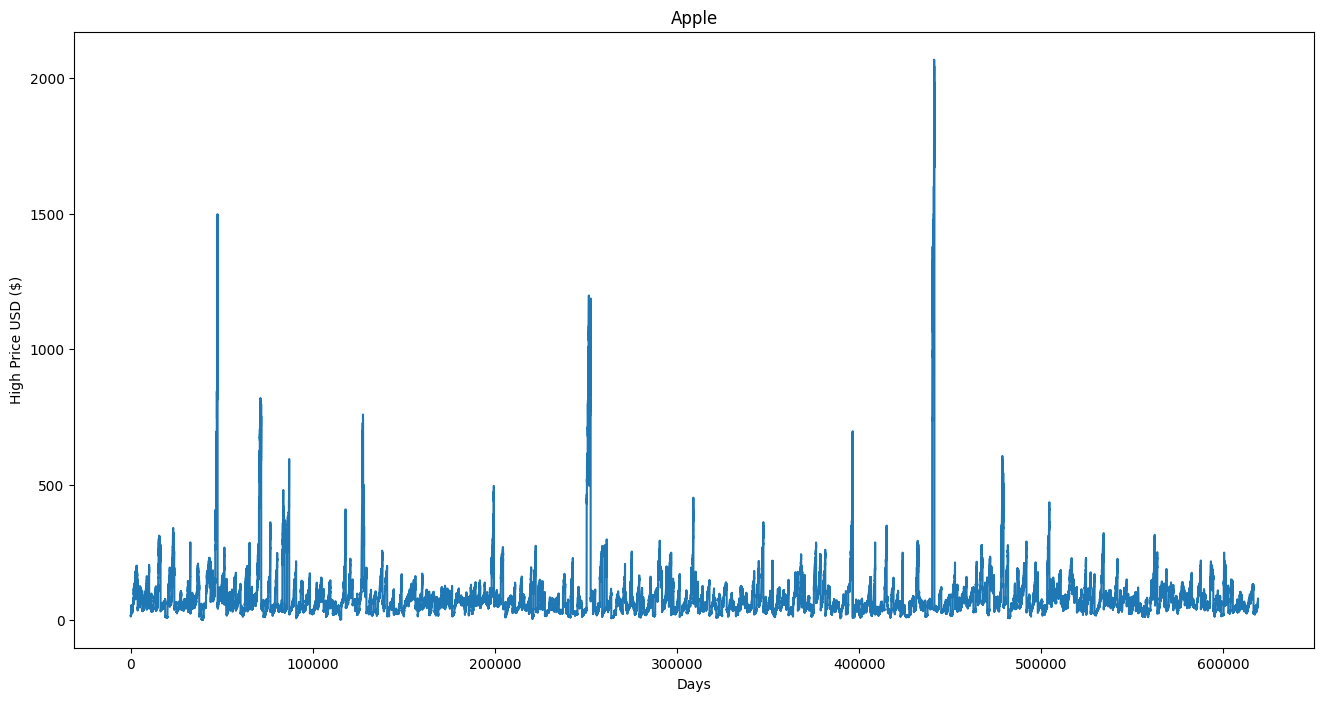

In [10]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

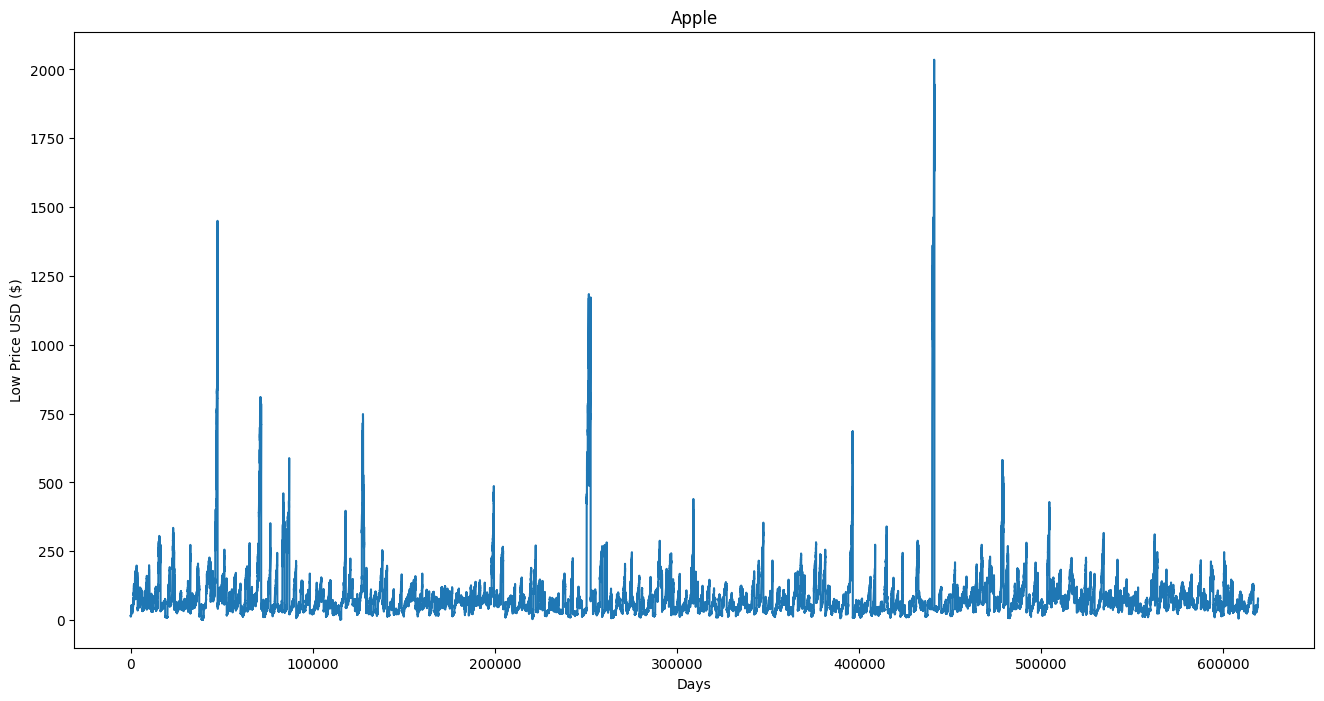

In [11]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

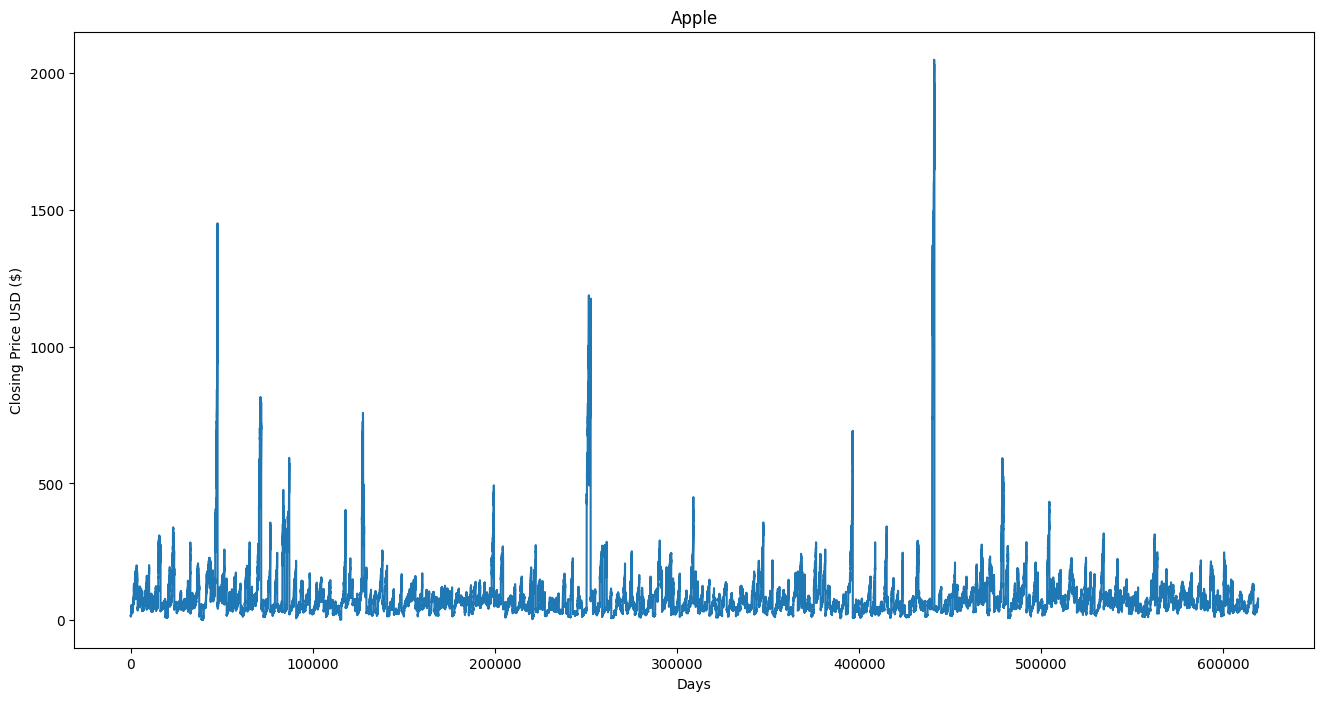

In [12]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])
plt.show()

In [13]:
df2 = df['close']

In [14]:
df2.tail()

619035    77.82
619036    76.78
619037    73.83
619038    73.27
619039    73.86
Name: close, dtype: float64

In [15]:
df2 = pd.DataFrame(df2)     

In [17]:
df2.tail()

,close
619035,77.82
619036,76.78
619037,73.83
619038,73.27
619039,73.86


In [18]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [19]:
df2.tail()

,close,Prediction
619035,77.82,NaN
619036,76.78,NaN
619037,73.83,NaN
619038,73.27,NaN
619039,73.86,NaN


In [25]:
X = np.array(df2.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[14.75]
 [14.46]
 [14.27]
 ...
 [65.4 ]
 [65.28]
 [65.25]]


In [27]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[16.75 16.84 16.94 ... 73.83 73.27 73.86]


# Linear and Decision Tree Regression

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [30]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [33]:
x_future = df2.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[55.12],
       [55.57],
       [56.46],
       [56.11],
       [56.28],
       [56.47],
       [55.59],
       [58.87],
       [59.47],
       [58.81],
       [59.43],
       [59.9 ],
       [59.72],
       [59.88],
       [60.  ],
       [60.33],
       [59.73],
       [59.91],
       [60.31],
       [60.31],
       [61.43],
       [62.3 ],
       [62.58],
       [62.61],
       [62.26],
       [62.28],
       [62.64],
       [62.5 ],
       [62.67],
       [62.98],
       [63.26],
       [62.58],
       [62.59],
       [61.85],
       [61.96],
       [62.23],
       [62.39],
       [62.55],
       [63.03],
       [63.  ],
       [63.  ],
       [63.51],
       [62.78],
       [62.72],
       [62.76],
       [62.95],
       [62.5 ],
       [62.38],
       [62.67],
       [62.55],
       [61.79],
       [62.59],
       [62.47],
       [62.21],
       [62.56],
       [63.05],
       [63.35],
       [63.07],
       [62.46],
       [62.42],
       [62.75],
       [63.16],
       [

In [35]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[61.17218438 59.97946429 57.38693878 57.65977273 59.38521739 59.50793103
 57.82611111 60.36968085 63.42928571 63.33991379 58.76826087 61.987
 61.01177083 62.17915254 60.51827586 66.46734694 61.26597826 61.47810811
 63.34192308 63.34192308 66.96875    68.9825     67.58714286 65.79355932
 65.35       68.14918919 63.68545455 64.61       64.2387037  64.62477273
 66.156      67.58714286 64.73270833 65.52759259 68.00488372 64.91793478
 65.04297619 62.37009091 64.65809524 65.20159722 65.20159722 65.66245098
 66.1975     69.33114583 64.84734694 63.65574074 64.61       66.71188525
 64.2387037  62.37009091 63.88191489 64.73270833 68.79125    67.04354167
 65.82163636 68.48553191 67.66429508 67.29428571 65.45145833 64.74301887
 65.44368421 65.35489362 66.68226415 64.87487115 61.98666667 65.98685185
 67.04354167 69.55754902 69.23647059 67.24785714 68.14918919 69.23647059
 68.28351351 60.51827586 61.19       63.33756098 61.26597826 61.79596154
 68.09290323 66.73294643 63.395      70.30797872 63.0497

In [36]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[58.24289403 58.64223204 59.43203388 59.12143765 59.27229868 59.44090806
 58.6599804  61.57071077 62.10316145 61.5174657  62.06766474 62.4847511
 62.3250159  62.46700275 62.57349288 62.86634076 62.33389008 62.49362528
 62.8485924  62.8485924  63.84250033 64.61455382 64.8630308  64.88965334
 64.57905711 64.59680546 64.91627587 64.79203738 64.9428984  65.21799792
 65.4664749  64.8630308  64.87190498 64.21521581 64.31283177 64.55243457
 64.69442142 64.83640827 65.26236881 65.23574628 65.23574628 65.68832935
 65.04051436 64.98726929 65.022766   65.19137539 64.79203738 64.68554724
 64.9428984  64.83640827 64.16197074 64.87190498 64.76541484 64.53468622
 64.84528245 65.28011717 65.54634251 65.29786552 64.75654067 64.72104395
 65.01389183 65.37773312 65.49309744 63.70938766 64.40157355 64.35720266
 64.53468622 64.80978573 64.45481861 63.94011629 64.59680546 64.45481861
 64.19746745 62.57349288 63.2923013  62.34276426 62.33389008 63.23018205
 63.48753322 63.90461958 63.3721689  63.23905623 63.

In [38]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/tmp/ipykernel_603669/236536272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = tree_prediction


In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()